## Часть 1. Гауссовы квадратуры

Метод Гауссовых квадратур является одним из методов численного интегрирования, который позволяет увеличить точность интегрирования, используя ортогональные полиномы и их корни в качестве узлов.

$$
\int_a^b \!  w(x)\, f(x)\, dx \approx \sum_{k=1}^n w_k \, f(x_k) \;,
$$

здесь $\omega$ - функция весов, которая определят базис ортогональных полиномов, чьи корни используются в качестве узлов интегрирования. Если функция $f(x)$ является полиномом, тогда такой метод интегрирования даст *точное* решение интеграла.

Например, давайте посчитаем следующий интеграл:

$$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx  \label{eq1}\tag{1}
$$

Здесь функция уже полиномиальна, поэтому возьмем весовую функцию $\omega(x) = 1$. Тогда вычисление интеграла сводится к сумме корней полинома, соответствующих весовой функции $\omega(x) = 1$. Например, здесь https://dlmf.nist.gov/18.3 вы можете увидеть, какой базис полиномов соответствует вашей весовой функции.

Заметим, что нашей соответствуют полиномы Лежандра. Теперь, зайдем в документацию https://docs.scipy.org/doc/scipy/reference/special.html#orthogonal-polynomials. Функция *roots_legendre* сразу же выдаст корни полиномов Лежандра, а также веса к их корням (для полиномов Лежандра все эти веса равны единице).

###  Задание 1.1

1. Посчитайте точное значение интеграла ([1](#mjx-eqn-eq1)) "руками". Сравните его с полученным численным значением.

In [34]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
C = [7, -8, -3, 3]
def real_value(C):
    s = 0
    N = len(C)
    for i in range(0, N, 2):
        s += C[i + 1] * 2 / (N - (i + 1))
    return s

In [35]:
print('Значение интеграла:',real_value(C))

Значение интеграла: 0.666666666666667


2. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), используя обычный метод интегрирования на равномерной сетке (например, написанный вами в week_6_calculus). Оцените количество узлов, необходимых для достижения относительной точности $10^{-10}$.

In [36]:
def us_int(C):
    err = np.inf
    N = 1
    while err > 10e-7: # должно быть 10e-10, но дальше компьютер считает слишком долго
        x = np.linspace(-1, 1, N) 
        val = np.sum(np.polyval(C, x) / N * 2)
        err = np.abs(real_value(C) - val)
        N = N * 10
    return val, N
print('Значение интеграла:', us_int(C)[0])
print('Количество узлов:', us_int(C)[1])

Значение интеграла: 0.6666665600000012
Количество узлов: 1000000000


3. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), используя корни полинома Лежандра степени от 1 до 6 в качестве узлов (чтобы получить корни и веса используйте scipy.special.roots_legendre)

In [37]:
N = 2
def leg_int(C, N):
    x, w = scipy.special.roots_legendre(N)
    return np.sum(w * np.polyval(C, x))
print('Значение интеграла:', leg_int(C, N))
    

Значение интеграла: 0.6666666666666665


Сравните количество узлов, необходимых для достижения одинаковой точности в обоих чисенных методах.

(20% итоговой оценки)

При использовании обычного метода интегрирования на равномерной сетке нам потребовалось в более 10^7 узлов, аналогичный результат можно получить использую корни полинома Лежандра и пару узлов.

###  Задание 1.2

Вычислите значение того же интеграла, но на интервале от 0 до 10.

$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx 
$$

Заметим, что больше нельзя использовать полиномы Лежанда, потому что они определены на интервале (-1, 1). Однако всегда можно произвести *аффинное преобразование* (преобразование не меняет область интегрирования) для того, чтобы перейти к желаемой системе координат.

(20% итоговой оценки)

In [38]:
N = 2
C = [875, 2425, 2210, 663] # Произведем афииное преоразование и найдем новые коэфициенты полинома
def leg_int(C, N):
    x, w = scipy.special.roots_legendre(N)
    return np.sum(w * np.polyval(C, x)) * 5
print('Значение интеграла:', leg_int(C, N))

Значение интеграла: 14713.333333333332


Совпадает с реальным ответом.

Сравните результат с точным значением интеграла.

### Задание 1.3

Вычислите значение следующиего интеграла:
$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}}
$$
используя соответствующий базис ортогональных полиномов.
Найдите степень полинома (количество узлов), при которой точность превысит ошибку плавающей точки.

(20% итоговой оценки)

In [39]:
N = 1
val0 = np.inf
val = 0
while np.abs(val0 - val) != 0:
    x, w = scipy.special.roots_chebyt(N)
    val0 = val 
    val = np.sum(w * np.cos(2 * np.pi * x) / 2)       
    N += 1
print('Значение интеграла:', val)
print('Степень полинома:', N)

Значение интеграла: 0.34601015881226443
Степень полинома: 18


## Часть 2. Уравение Фредгольма

Существует два типа уравнений Фредгольма: 

1. Уравение Фредгольма первого рода:
$$
\int_a^b \! K(x, t)\, \color{blue}{f(t)} \,dt = g(x)
$$

2. Уравнение Фредгольма второго рода:
$$
\lambda \int_a^b\! K(x, t)\, \color{blue}{f(t)} \, dt + g(x) = \color{blue}{f(x)}
$$

Здесь функция $f(x)$ неизвестна, $K(x, t)$ - ядро уравнения, заданная функция $g(x)$ и $\lambda$ - рациональное число.
С точки зрения вычислений, уравение Фредгольма первого рода крайне неустойчиво. Далее мы рассмотрим только уравнение второго рода.

Основная идея - аппроксимировать интеграл некой квадратурной формулой

$$
\int_a^b \! \xi(t)\, dt \approx \sum_j^N w_j\, \xi(t_j)
$$

с подходящими весами $w_j$ и узлами $t_j$, $j=1, \dots, N$. Точность аппроксимации контролируется $N$.

Таким образом, уравнение Фредгольма приближается следующим образом:

$$
\lambda \sum_j w_j\, K(x, t_j)\, \color{blue}{f(t_j)} + g(x) = \color{blue}{f(x)}
$$

Отметим, что $x$ - непрерывная переменная, в то время, как $t$ - дискретная.

Оценивая данное уравнение на сетке $x = t_k$, получаем

$$
\lambda \sum_j w_j \, K_{k, j}\, \color{blue}{f_j} + g_k = \color{blue}{f_k}
$$

где $f_j \equiv f(t_j)$, $g_j \equiv g(t_j)$ and $K_{k, j} \equiv K(t_k, t_j)$. Это ничто иное, как система линейных алгебраических уравнений на вектор $\color{blue}{f_j}$.

Ее решение выдает значение неизвестной функции $f(x)$ в дискретных точках $x=t_j$ для $j=1, \dots, N$.

### Задание 2.1

Решите предложенное уравнение Фредгольма второго рода

$$
f(x) = \sin(\pi x)  + \frac{1}{2} \int_0^1\! f(t) \, dt
$$

Здесь $a, b = 0, 1$, $\lambda = \dfrac{1}{2}$, ядро $K(x, t) = 1$ и правая часть - $g(x) = \sin(\pi x)$.

Точное решение (Сборник задач по интегральным уравнениям, 2006, стр. 5):

$$
f(x) = \sin(\pi x) + \frac{2}{\pi}
$$

Для нахождения интеграла воспользуйтесь Гауссовой квадратурой с весовой функцией $w(x) = 1$ на $(0, 1)$. Посмотрите на http://dlmf.nist.gov/18.3, и найдите соответствующую функцию в *scipy.special* (обратите внимание на область интегрирования).

Сравните полученные значения функции с точным решением для разных значений $N$. На каком $N$ можно остановиться?

(20% итоговой оценки)

Приведем указанную выше формулу к виду и реализуем наш алгоритм

$$
\sum_j (\delta_{kj} - \lambda \, w_j \, K_{kj}) \color{blue}{f_j} = g_k
$$

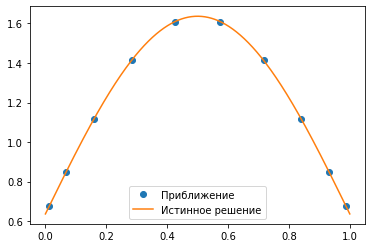

In [74]:
N = 10
def sol(x):
    return np.sin(np.pi * x)
def rsol(x):
    return np.sin(np.pi * x) + 2 / np.pi
lam = 0.5
x, w = scipy.special.roots_sh_legendre(N)
k = np.empty([N,N]) 
k[:] = w # создадим систему подходяших весов
a = np.eye(N) - lam * k #найдем коэфициенты системы линейных уравнений
b = []
for i in range(N):
    h = x[i]
    b.append(sol(h)) #найдем правую часть системы линейных уравнений
xlim = np.linspace(0, 1, 1000)  
y = np.linalg.solve(a, b)
plt.plot(x, y, 'o', label='Приближение')
plt.plot(xlim, rsol(xlim), '-', label='Истинное решение')
plt.legend()

### Задание 2.2

Очевидной проблемой предыдущего результата для $f(x)$ является то, что он возвращает решения на фиксированном наборе точек. Мы не контролируем их точное расположение.

1. Для начала, попробуйте интерполировать значения, полученные в предыдущем пункте на равномерной сетке длиной 50. Можете использовать любой метод интерполяции. Сравните интерполяцию с точным значением.

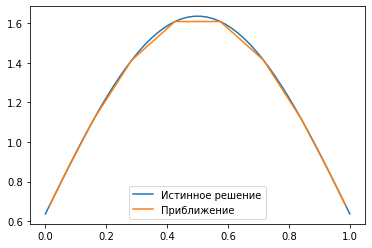

In [73]:
from scipy.interpolate import interp1d
xlim = np.linspace(0, 1, 50)
f = interp1d(x, y)
plt.plot(xlim, rsol(xlim) , label='Истинное решение')
plt.plot(x, f(x), label='Приближение')
plt.legend()

2. Теперь используйте следующую формулу, чтобы вычислить значение функции на той же равномерной сетке.

$$
f(x) = g(x) + \lambda \sum_j^N w_j\, K(x, t_j)\, f(t_j)
$$

Сравните эту интерполяцию с точным значением, а также с прямым интерполяционным методом.

(20% итогой оценки)

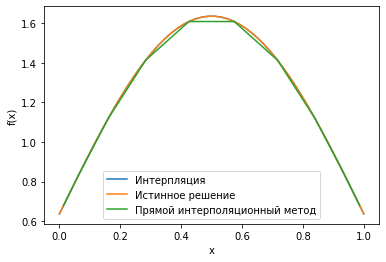

In [72]:
xz, w = scipy.special.roots_sh_legendre(N)
def f(x):
    return sol(x) + lam * w @ y
plt.plot(xlim, f(xlim), label='Интерпляция')
plt.plot(xlim, rsol(xlim), label='Истинное решение')
plt.plot(x, f(x), label='Прямой интерполяционный метод')
plt.legend()